# Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset.

### Rahul Agrawal BC202

In [298]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [300]:
df = pd.read_csv('diabetes.csv')

df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
414,0,138,60,35,167,34.6,0.534,21,1
205,5,111,72,28,0,23.9,0.407,27,0
402,5,136,84,41,88,35.0,0.286,35,1
559,11,85,74,0,0,30.1,0.300,35,0
410,6,102,90,39,0,35.7,0.674,28,0
209,7,184,84,33,0,35.5,0.355,41,1
305,2,120,76,37,105,39.7,0.215,29,0
704,4,110,76,20,100,28.4,0.118,27,0
343,5,122,86,0,0,34.7,0.290,33,0
341,1,95,74,21,73,25.9,0.673,36,0


In [301]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [302]:
df.Outcome.unique()

array([1, 0])

In [303]:
print(df.isnull().sum())

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


In [304]:
print("DataFrame Total Rows are : ", len(df))

DataFrame Total Rows are :  768


#### Outliers

/home/mmcoe/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies'>

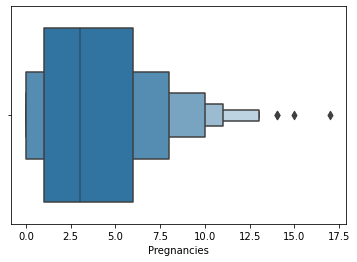

In [305]:
sns.boxenplot(df["Pregnancies"])

In [306]:
df =df.drop([index for index,i in enumerate(df["Pregnancies"]) if i > 12])

/home/mmcoe/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies'>

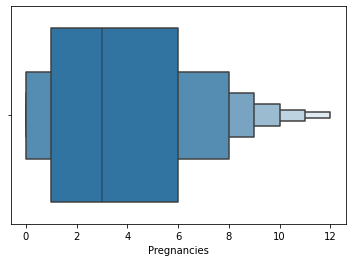

In [307]:
sns.boxenplot(df["Pregnancies"])

In [308]:
print("DataFrame Total Rows are : ", len(df))

DataFrame Total Rows are :  754


/home/mmcoe/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

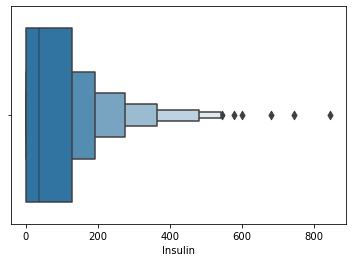

In [309]:
sns.boxenplot(df["Insulin"])

In [310]:
df = df.drop([index for index,i in enumerate(df["Insulin"]) if i > 500])

/home/mmcoe/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

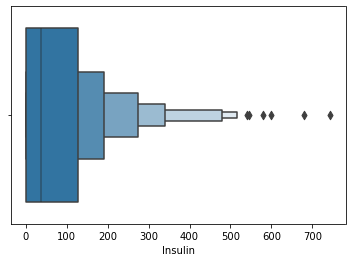

In [311]:
sns.boxenplot(df["Insulin"])

In [312]:
print("DataFrame Total Rows are : ", len(df))

DataFrame Total Rows are :  745


In [313]:
df = df.reset_index()  # make sure indexes pair with number of rows

In [314]:
#  checking outcome balance

one = 0 
zero = 0


for i in df.Outcome:
    if i == 1 :
        one = one +1 
    else:
        zero = zero +1

In [315]:
zero , one

(492, 253)

In [316]:
zero_index = [index for index,i in enumerate(df.Outcome) if i == 0]

In [317]:
#  selecting random to balance out data 

import random


choosen_index = random.sample(zero_index , zero - one )

print("removing : ", len(choosen_index) , " rows")

removing :  239  rows


In [318]:
df = df.drop(choosen_index)

In [319]:
#  checking outcome balance

one = 0 
zero = 0


for i in df.Outcome:
    if i == 1 :
        one = one +1 
    else:
        zero = zero +1
        
zero , one

(253, 253)

In [320]:
df.describe()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,506.00000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,386.26087,4.059289,125.853755,69.810277,20.606719,81.047431,32.553360,0.489834,34.126482,0.500000
std,222.20816,3.271909,33.587986,19.724628,16.616629,114.982641,8.026957,0.347297,11.668686,0.500495
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,0.000000
25%,197.25000,1.000000,102.000000,64.000000,0.000000,0.000000,27.800000,0.246250,25.000000,0.000000
50%,387.50000,3.000000,122.000000,72.000000,23.000000,0.000000,32.500000,0.384000,31.000000,0.500000
75%,578.75000,7.000000,147.000000,80.000000,33.000000,140.000000,36.950000,0.652000,41.000000,1.000000
max,767.00000,12.000000,199.000000,110.000000,99.000000,600.000000,67.100000,2.420000,81.000000,1.000000


## Scale and Split

In [321]:
X = df.drop(["Outcome"] , axis =1)

y = df["Outcome"]

In [322]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [323]:
print(f" X_train shape = {X_train.shape}")
print(f" X_test shape = {X_test.shape}")

 X_train shape = (404, 9)
 X_test shape = (102, 9)


In [324]:
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler() 

scaler.fit(X_train)

scaler.transform(X_train)
scaler.transform(X_test)



array([[-5.42056136e-01, -1.25526043e+00,  3.44368358e-01,
        -3.56004651e+00, -1.24518971e+00, -7.24756274e-01,
         4.81810345e-01,  1.27658309e+00, -7.69347390e-01],
       [ 1.56737053e-01, -2.21292113e-02,  5.19294783e-01,
         6.04844572e-01,  6.73043437e-01, -7.24756274e-01,
         7.69988699e-01,  1.91755631e-01,  2.57013685e-01],
       [ 1.70703982e+00, -3.30412017e-01, -5.30263767e-01,
        -4.10982521e-01,  1.93485150e-01, -7.24756274e-01,
        -8.67388314e-01, -7.55679432e-01, -7.69347390e-01],
       [-1.25010486e+00, -2.21292113e-02, -1.46320470e+00,
        -4.10982521e-01, -1.24518971e+00, -7.24756274e-01,
         1.80532974e-01, -2.74806047e-01, -7.69347390e-01],
       [ 1.42011812e+00,  1.21100201e+00, -5.59418171e-01,
         5.03261863e-01, -1.24518971e+00, -7.24756274e-01,
        -1.05077454e+00,  1.05618279e+00,  4.23416285e-04],
       [-1.21771048e+00, -1.25526043e+00,  1.04407406e+00,
         3.00096444e-01,  2.11171830e+00,  1.291414

# Using KNN

#### Selecting Value for    K or N-Neighbors

In [325]:
from sklearn.neighbors import KNeighborsClassifier

max_score = 0
n = 0

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train, y_train)
    print(f"For i = {i} " , end=" ")

    # Calculate the accuracy of the model
    print(round(knn.score(X_test, y_test)*100 , 3) , "%")
    
    if max_score < knn.score(X_test, y_test):
        n = i

For i = 1  60.784 %
For i = 2  57.843 %
For i = 3  62.745 %
For i = 4  59.804 %
For i = 5  64.706 %
For i = 6  62.745 %
For i = 7  67.647 %
For i = 8  65.686 %
For i = 9  67.647 %
For i = 10  65.686 %
For i = 11  69.608 %
For i = 12  67.647 %
For i = 13  72.549 %
For i = 14  66.667 %
For i = 15  73.529 %
For i = 16  68.627 %
For i = 17  68.627 %
For i = 18  65.686 %
For i = 19  67.647 %
For i = 20  68.627 %
For i = 21  68.627 %
For i = 22  65.686 %
For i = 23  67.647 %
For i = 24  64.706 %
For i = 25  68.627 %
For i = 26  64.706 %
For i = 27  64.706 %
For i = 28  62.745 %
For i = 29  64.706 %
For i = 30  60.784 %
For i = 31  61.765 %
For i = 32  59.804 %
For i = 33  58.824 %
For i = 34  57.843 %
For i = 35  60.784 %
For i = 36  60.784 %
For i = 37  60.784 %
For i = 38  59.804 %
For i = 39  61.765 %
For i = 40  58.824 %
For i = 41  58.824 %
For i = 42  57.843 %
For i = 43  57.843 %
For i = 44  59.804 %
For i = 45  59.804 %
For i = 46  61.765 %
For i = 47  60.784 %
For i = 48  59.804 %
F

# accuracy

In [333]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
print(round(knn.score(X_test, y_test)*100 , 3) , "%")

73.529 %


In [334]:
y_pred = knn.predict(X_test)

# confusion matrix

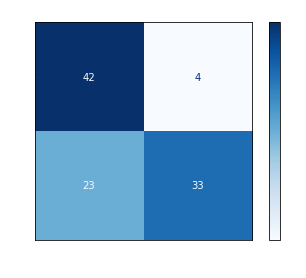

In [335]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# error rate

In [336]:
from sklearn.metrics import zero_one_loss

error_rate = zero_one_loss(y_test, y_pred)

error_rate

0.2647058823529411

# recall

In [337]:
from sklearn.metrics import recall_score

print("Recall : " , (recall_score(y_test, y_pred, average='binary'))*100 )

Recall :  58.92857142857143


# precision 

In [338]:
from sklearn.metrics import precision_score

print("precision_score : " , (precision_score(y_test, y_pred, average='binary'))*100 )

precision_score :  89.1891891891892
